In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, preprocessing, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import chi2_contingency

cbb_13to21 = pd.read_csv('cbb.csv')

In [208]:
cbb_13to21['POSTSEASON'].value_counts()

R64          224
R32          112
S16           56
E8            28
R68           28
F4            14
2ND            7
Champions      7
Name: POSTSEASON, dtype: int64

In [209]:
cbb_13to21['TOURNEY'] = np.where(cbb_13to21['POSTSEASON'].notnull(), True, False)
cbb_13to21[cbb_13to21['TOURNEY'] == False]

TEAM  CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D  \
56               Duquesne   A10  30  11  107.0  111.7   0.3790   51.2   51.7   
57                Fordham   A10  30   9  101.0  103.0   0.4450   46.7   50.2   
58           George Mason   A10  30   8  101.2  103.8   0.4276   45.5   50.0   
59      George Washington   A10  35  22  107.2   96.2   0.7755   48.9   45.9   
60               La Salle   A10  33  17   98.9   92.9   0.6734   46.7   45.8   
...                   ...   ...  ..  ..    ...    ...      ...    ...    ...   
2030     Prairie View A&M  SWAC  31  12   87.1  103.5   0.1209   41.3   46.9   
2031              Buffalo   MAC  32  12  102.5  103.4   0.4761   50.4   47.2   
2032  Louisiana Lafayette    SB  32  12   98.4  105.3   0.3135   48.6   48.8   
2033      Bethune Cookman  MEAC  32  12   96.0  107.5   0.2134   45.9   51.0   
2034                 Troy    SB  33  12   97.3  107.5   0.2416   45.3   51.0   

       TOR  ...  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  POSTSEASON  SEED  YEAR  \
56    18.3  ...  49.5  47.7  36.2  38.5   67.6 -11.3         NaN   NaN  2015   
57    22.2  ...  47.8  49.6  29.8  34.1   65.9 -12.3         NaN   NaN  2015   
58    21.9  ...  44.9  48.4  31.6  35.3   65.0 -12.6         NaN   NaN  2015   
59    18.7  ...  47.3  44.9  35.2  31.9   62.7  -2.3         NaN   NaN  2015   
60    19.9  ...  46.1  45.1  32.1  31.6   64.8  -6.3         NaN   NaN  2015   
...    ...  ...   ...   ...   ...   ...    ...   ...         ...   ...   ...   
2030  21.6  ...  42.0  46.9  26.0  31.3   67.0 -15.1         NaN   NaN  2013   
2031  23.7  ...  50.0  46.1  34.2  33.2   65.4 -13.6         NaN   NaN  2013   
2032  19.6  ...  46.9  47.2  34.5  34.9   70.2 -13.9         NaN   NaN  2013   
2033  18.4  ...  45.6  50.9  31.0  34.1   65.9 -15.0         NaN   NaN  2013   
2034  16.5  ...  44.5  49.5  31.2  35.8   61.1 -16.6         NaN   NaN  2013   

      TOURNEY  
56      False  
57      False  
58      False  
59      False  
60      False  
...       ...  
2030    False  
2031    False  
2032    False  
2033    False  
2034    False  

[1979 rows x 25 columns]

In [210]:
cbb_13to21.isnull().sum()

TEAM             0
CONF             0
G                0
W                0
ADJOE            0
ADJDE            0
BARTHAG          0
EFG_O            0
EFG_D            0
TOR              0
TORD             0
ORB              0
DRB              0
FTR              0
FTRD             0
2P_O             0
2P_D             0
3P_O             0
3P_D             0
ADJ_T            0
WAB              0
POSTSEASON    1979
SEED          1979
YEAR             0
TOURNEY          0
dtype: int64

In [211]:
cbb_13to21.describe()

G            W        ADJOE        ADJDE      BARTHAG  \
count  2455.000000  2455.000000  2455.000000  2455.000000  2455.000000   
mean     31.492464    16.284318   103.304481   103.304603     0.493957   
std       2.657401     6.610960     7.376981     6.605318     0.256244   
min      15.000000     0.000000    76.600000    84.000000     0.005000   
25%      30.000000    11.000000    98.300000    98.500000     0.282200   
50%      31.000000    16.000000   103.000000   103.500000     0.475000   
75%      33.000000    21.000000   108.000000   107.900000     0.712200   
max      40.000000    38.000000   129.100000   124.000000     0.984200   

             EFG_O        EFG_D          TOR         TORD          ORB  ...  \
count  2455.000000  2455.000000  2455.000000  2455.000000  2455.000000  ...   
mean     49.805132    50.001385    18.763055    18.689572    29.875642  ...   
std       3.143061     2.939602     2.090595     2.201749     4.134332  ...   
min      39.200000    39.600000    11.900000    10.200000    15.000000  ...   
25%      47.750000    48.000000    17.300000    17.200000    27.100000  ...   
50%      49.700000    50.000000    18.700000    18.600000    29.900000  ...   
75%      51.900000    52.000000    20.100000    20.100000    32.600000  ...   
max      59.800000    59.500000    27.100000    28.500000    43.600000  ...   

               FTR        FTRD         2P_O         2P_D         3P_O  \
count  2455.000000  2455.00000  2455.000000  2455.000000  2455.000000   
mean     35.989776    36.26998    48.802281    48.976660    34.406395   
std       5.247820     6.24590     3.384468     3.340546     2.789434   
min      21.600000    21.80000    37.700000    37.700000    24.900000   
25%      32.400000    31.90000    46.500000    46.700000    32.500000   
50%      35.800000    35.80000    48.700000    49.000000    34.400000   
75%      39.500000    40.20000    51.000000    51.300000    36.300000   
max      58.600000    60.70000    62.600000    61.200000    44.100000   

              3P_D        ADJ_T          WAB        SEED         YEAR  
count  2455.000000  2455.000000  2455.000000  476.000000  2455.000000  
mean     34.598737    67.812301    -7.802485    8.802521  2016.007332  
std       2.415766     3.277622     6.965736    4.676354     1.999375  
min      27.100000    57.200000   -25.200000    1.000000  2013.000000  
25%      33.000000    65.700000   -13.000000    5.000000  2014.000000  
50%      34.600000    67.800000    -8.300000    9.000000  2016.000000  
75%      36.200000    70.000000    -3.150000   13.000000  2018.000000  
max      43.100000    83.400000    13.100000   16.000000  2019.000000  

[8 rows x 21 columns]

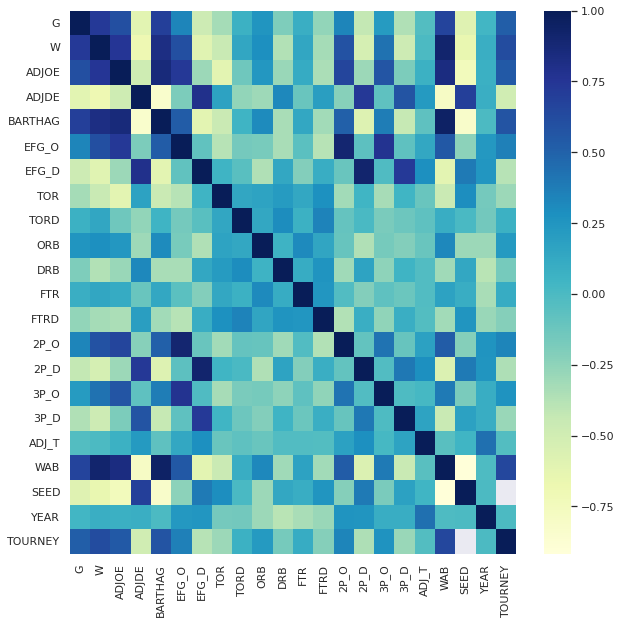

In [212]:
sns.heatmap(cbb_13to21.corr(), cmap="YlGnBu")
sns.set(rc={'figure.figsize':(10,10)})

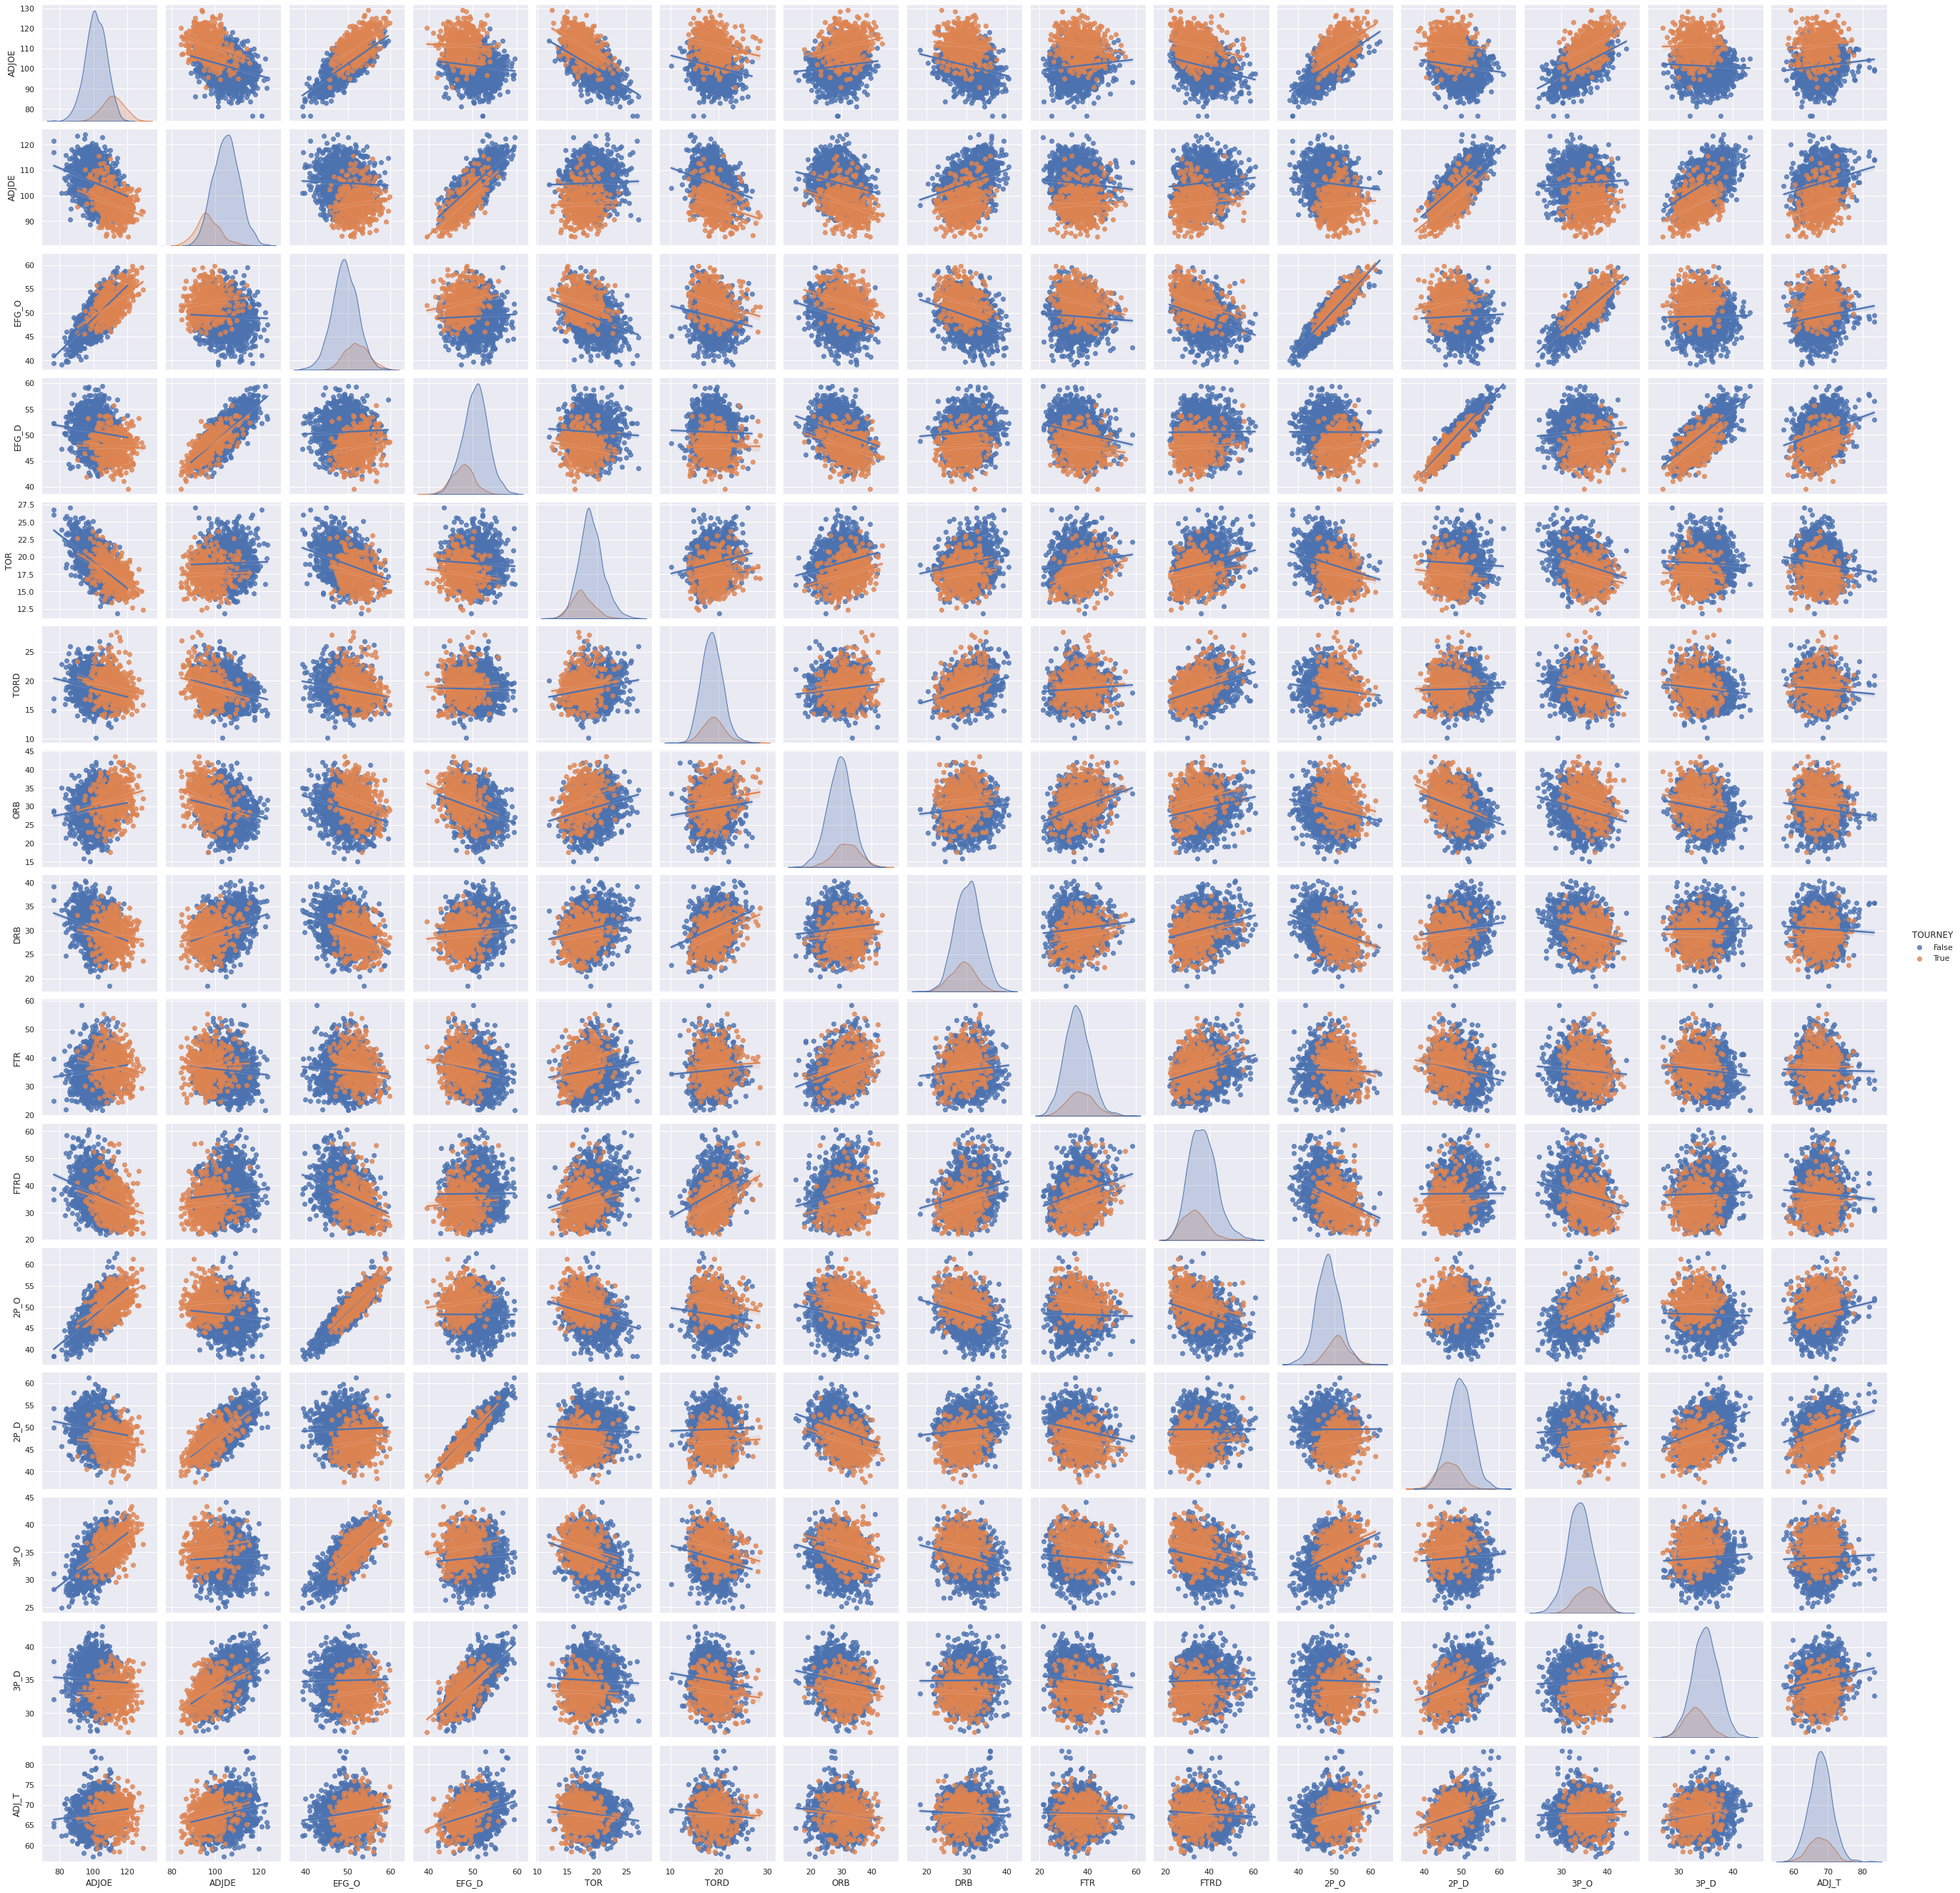

In [213]:
df = cbb_13to21.drop(columns=['TEAM', 'CONF', 'POSTSEASON', 'SEED', 'YEAR', 'G', 'W', 'BARTHAG', 'WAB'])
sns.pairplot(df, kind='reg', hue='TOURNEY')

In [214]:
cbb_other = cbb_13to21[cbb_13to21['TOURNEY'] == False]
cbb_tourney = cbb_13to21[cbb_13to21['TOURNEY'] == True]

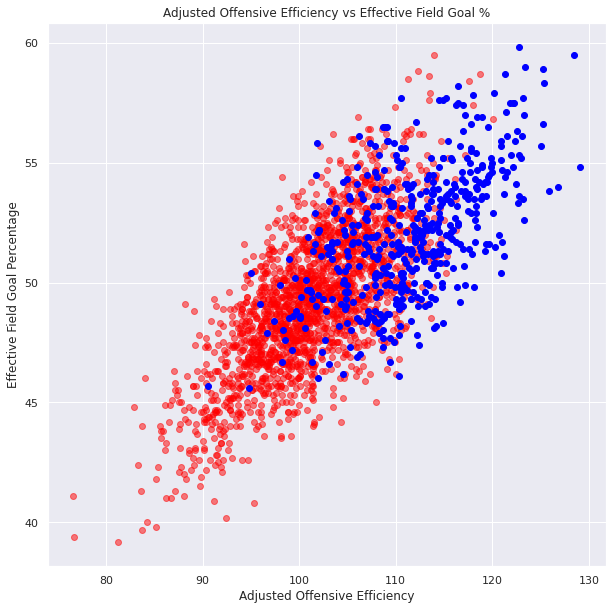

In [215]:
fig, ax = plt.subplots()

ax.scatter(cbb_other['ADJOE'], cbb_other['EFG_O'], c='red', alpha = .5)
ax.scatter(cbb_tourney['ADJOE'], cbb_tourney['EFG_O'], c='blue')
plt.xlabel("Adjusted Offensive Efficiency")
plt.ylabel("Effective Field Goal Percentage")
plt.title("Adjusted Offensive Efficiency vs Effective Field Goal %")
plt.show()


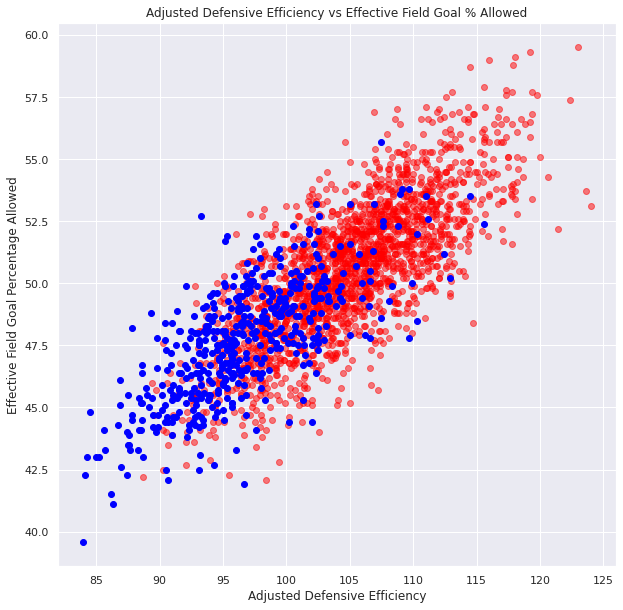

In [216]:
fig, ax = plt.subplots()

ax.scatter(cbb_other['ADJDE'], cbb_other['EFG_D'], c='red', alpha=.5)
ax.scatter(cbb_tourney['ADJDE'], cbb_tourney['EFG_D'], c='blue')
plt.xlabel("Adjusted Defensive Efficiency")
plt.ylabel("Effective Field Goal Percentage Allowed")
plt.title("Adjusted Defensive Efficiency vs Effective Field Goal % Allowed")
plt.show()

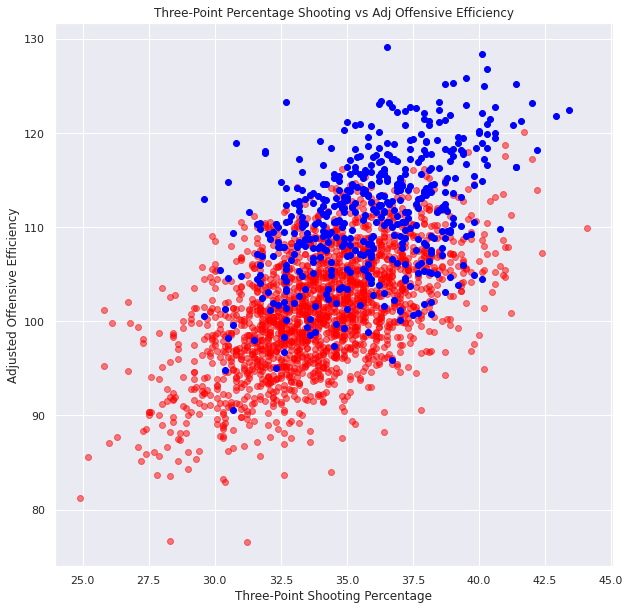

In [217]:
fig, ax = plt.subplots()

ax.scatter(cbb_other['3P_O'], cbb_other['ADJOE'], c='red', alpha=.5)
ax.scatter(cbb_tourney['3P_O'], cbb_tourney['ADJOE'], c='blue')
plt.xlabel("Three-Point Shooting Percentage")
plt.ylabel("Adjusted Offensive Efficiency")
plt.title("Three-Point Percentage Shooting vs Adj Offensive Efficiency")
plt.show()

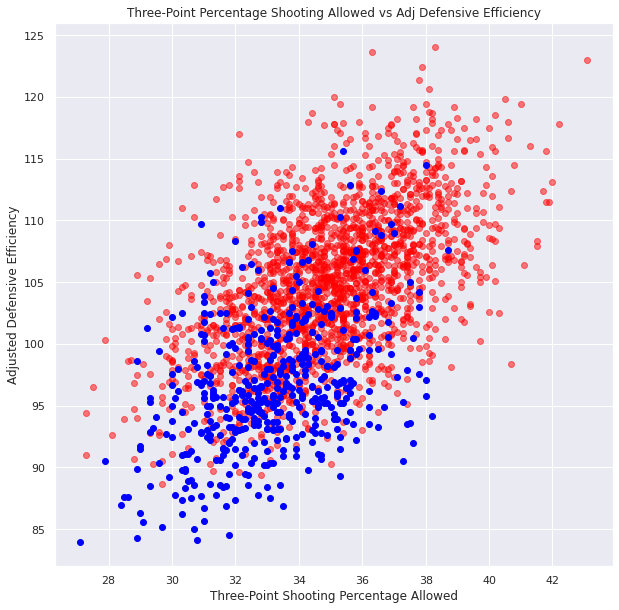

In [218]:
fig, ax = plt.subplots()

ax.scatter(cbb_other['3P_D'], cbb_other['ADJDE'], c='red', alpha=.5)
ax.scatter(cbb_tourney['3P_D'], cbb_tourney['ADJDE'], c='blue')
plt.xlabel("Three-Point Shooting Percentage Allowed")
plt.ylabel("Adjusted Defensive Efficiency")
plt.title("Three-Point Percentage Shooting Allowed vs Adj Defensive Efficiency")
plt.show()

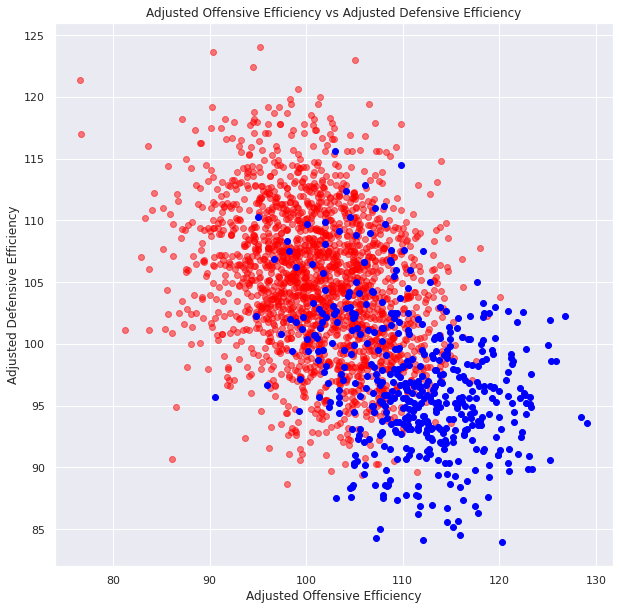

In [219]:
fig, ax = plt.subplots()

ax.scatter(cbb_other['ADJOE'], cbb_other['ADJDE'], c='red', alpha=.5)
ax.scatter(cbb_tourney['ADJOE'], cbb_tourney['ADJDE'], c='blue')
plt.xlabel("Adjusted Offensive Efficiency")
plt.ylabel("Adjusted Defensive Efficiency")
plt.title("Adjusted Offensive Efficiency vs Adjusted Defensive Efficiency")
plt.show()

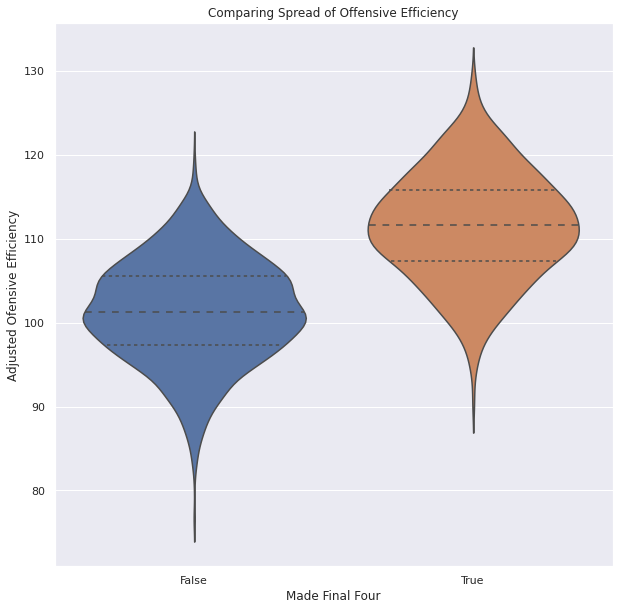

In [220]:
fig, ax = plt.subplots()

sns.violinplot(x = 'TOURNEY', y='ADJOE', data=cbb_13to21, inner='quartiles')
plt.xlabel("Made Final Four")
plt.ylabel("Adjusted Ofensive Efficiency")
plt.title("Comparing Spread of Offensive Efficiency")

plt.show()

In [221]:
visual_df = cbb_13to21.drop(columns=['TEAM', 'CONF', 'POSTSEASON', 'SEED', 'YEAR', 'TOURNEY'])
visual_df2 = cbb_13to21.drop(columns=['TEAM', 'CONF', 'POSTSEASON', 'SEED', 'YEAR'])
dict = {
    'G':'Games',
    'W':'Wins',
    'ADJOE':'Adjusted Offensive Efficiency',
    'ADJDE':'Adjusted Defensive Efficiency',
    'BARTHAG':'Chance of Beating an Average DI Team',
    'EFG_O':'Effective Field Goal Percentage Shot',
    'EFG_D':'Effective Field Goal Percentage Allowed',
    'TOR':'Turnover Rate',
    'TORD':'Steal Rate',
    'ORB':'Offensive Rebound Rate',
    'DRB':'Offensive Rebound Rate Allowed',
    'FTR':'Free Throw Rate',
    'FTRD':'Free Throw Rate Allowed',
    '2P_O':'Two-Point Shooting Percentage',
    '2P_D':'Two-Point Shooting Percentage Allowed',
    '3P_O':'Three-Point Shooting Percentage',
    '3P_D':'Three-Point Shooting Percentage Allowed',
    'ADJ_T':'Adjusted Tempo',
    'WAB':'Wins Above Bubble'
}

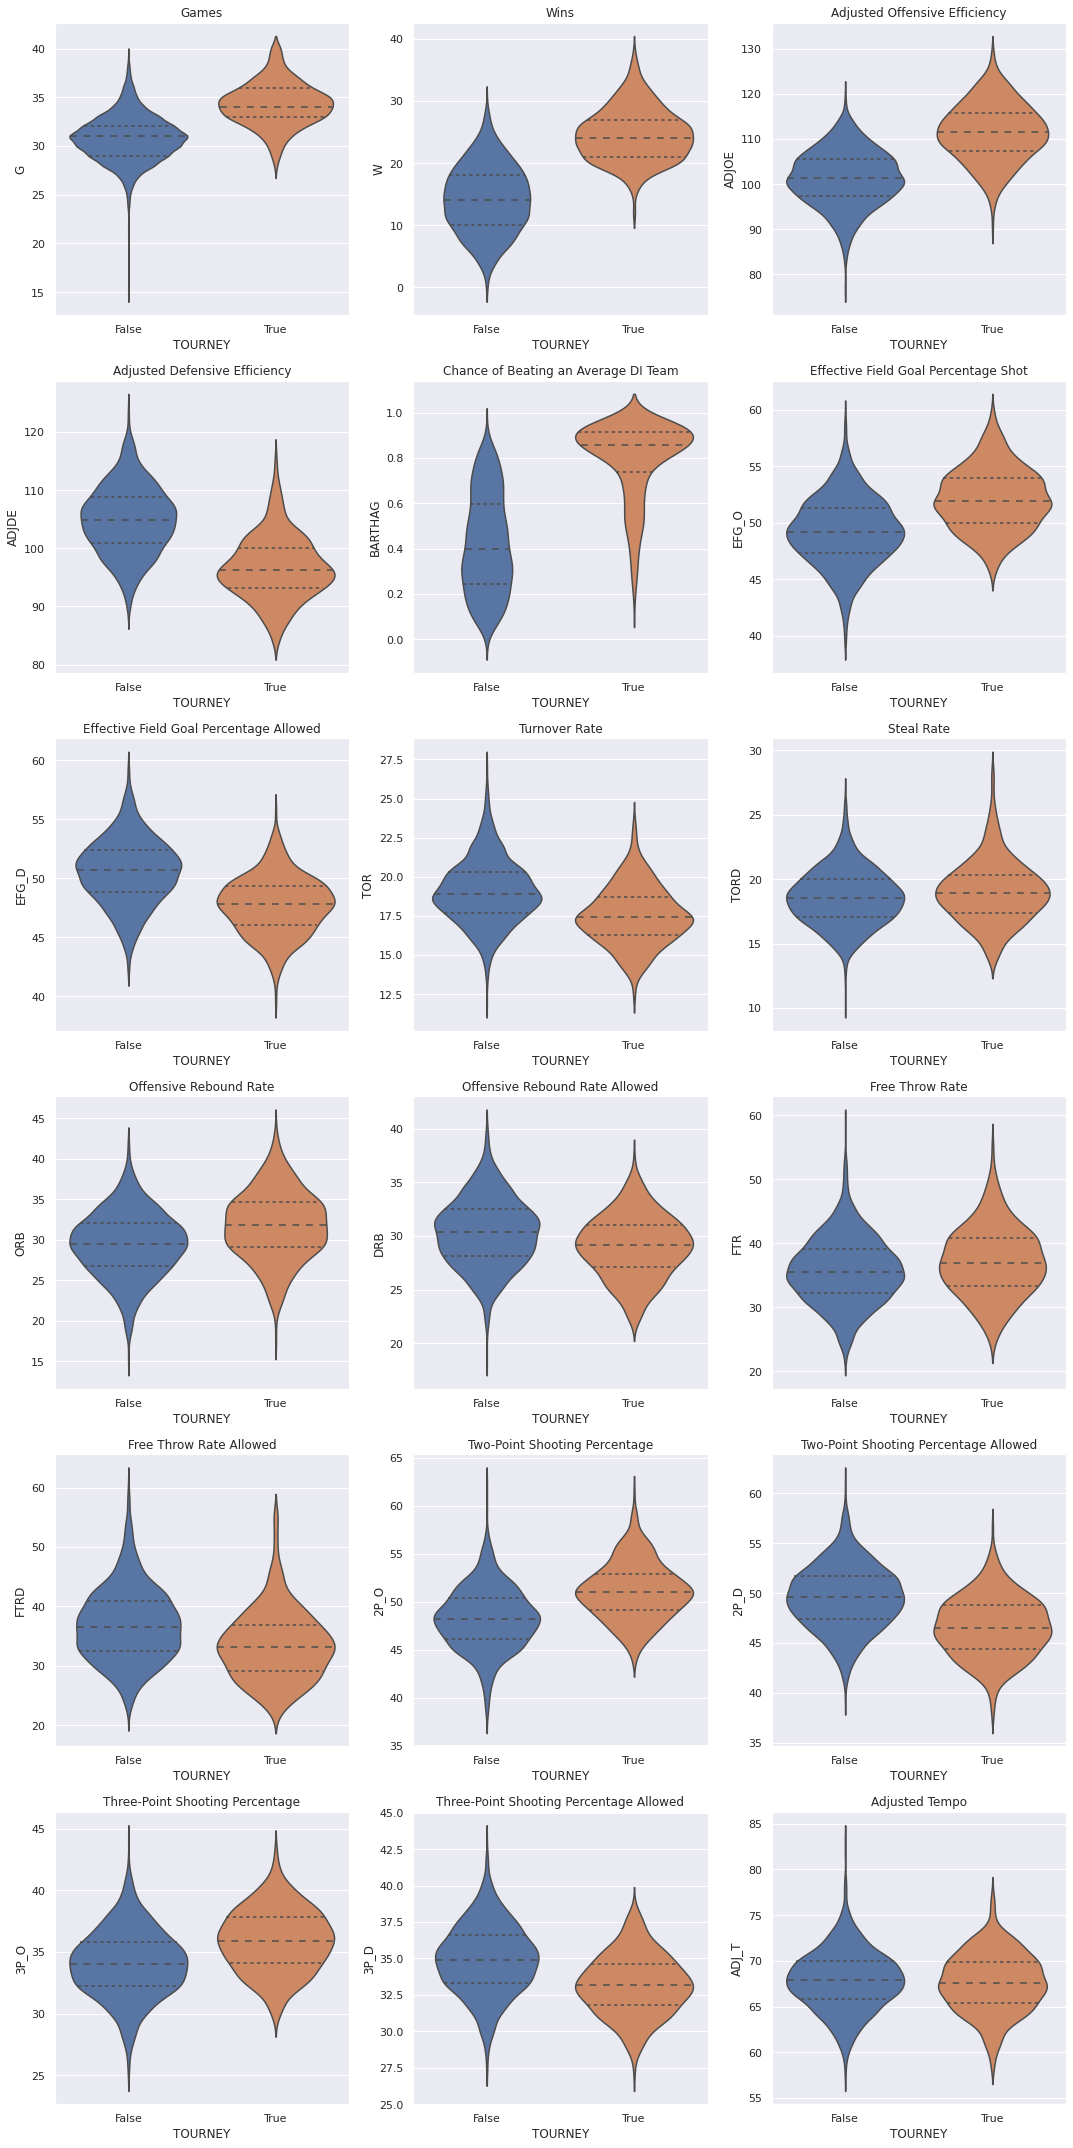

In [222]:
fig = plt.figure(figsize=(30,30))
grid = fig.add_gridspec(6,6)
subplot_list = []
for x in range(0,6):
    for y in range(0,3):
        subplot_list.append(fig.add_subplot(grid[x,y]))

cols = visual_df.columns
for col, subplot in zip(cols, subplot_list):
    sns.violinplot(x = 'TOURNEY', y=col, data=cbb_13to21, inner='quartiles', ax=subplot)
    subplot.set_title(dict[col])

fig.tight_layout()
plt.show()

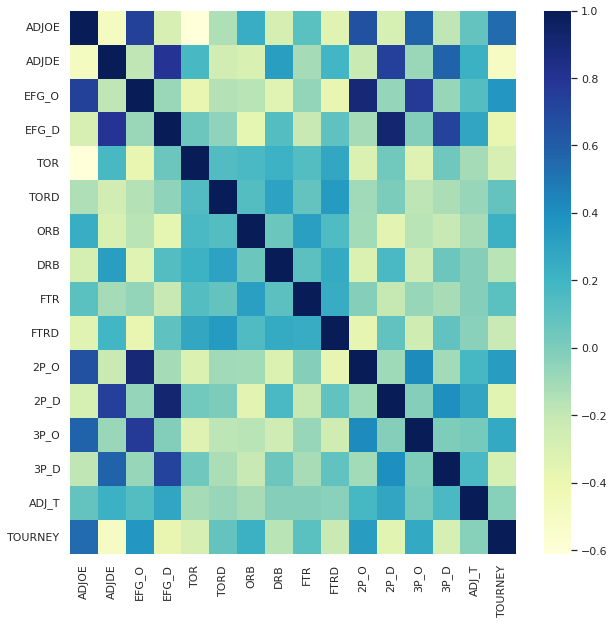

In [223]:
cbb = cbb_13to21.drop(columns=['TEAM', 'CONF', 'POSTSEASON', 'SEED', 'YEAR', 'G', 'W', 'BARTHAG', 'WAB'])

sns.heatmap(cbb.corr(), cmap="YlGnBu")
sns.set(rc={'figure.figsize':(10,10)})

In [224]:
cbb_features = cbb.iloc[:,:-1]
cbb_label = cbb['TOURNEY']

ind = []
dep = []
pval = []

for col in cbb_features:
    csq = chi2_contingency(pd.crosstab(cbb[col], cbb['TOURNEY']))
    pval.append(csq[1])
    if csq[1] > .05:
        ind.append(col)
    else:
        dep.append(col)
    print(str(col) + " p-value: " + str(csq[1]))

print("Independent Features: " + str(ind))
print("Dependent Features: " + str(dep))

ADJOE p-value: 3.4764572966789143e-81
ADJDE p-value: 6.743592839012311e-69
EFG_O p-value: 1.3221470306479153e-33
EFG_D p-value: 1.00238239688931e-38
TOR p-value: 2.785675155726798e-22
TORD p-value: 0.034092821524116176
ORB p-value: 4.9122732805854736e-05
DRB p-value: 0.006646091135500911
FTR p-value: 0.21717855012036538
FTRD p-value: 1.6709203644346735e-06
2P_O p-value: 5.875844364327951e-23
2P_D p-value: 2.826525380057135e-29
3P_O p-value: 2.5798046940770557e-13
3P_D p-value: 2.359711828614138e-15
ADJ_T p-value: 0.08200786766686213
Independent Features: ['FTR', 'ADJ_T']
Dependent Features: ['ADJOE', 'ADJDE', 'EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D']


https://towardsdatascience.com/tuning-the-hyperparameters-of-your-machine-learning-model-using-gridsearchcv-7fc2bb76ff27

In [225]:
cbb = cbb.drop(columns=ind)

cbb_features = cbb.iloc[:,:-1]
cbb_label = cbb['TOURNEY']

X = cbb_features.values
y = cbb_label.values   

print(X.shape)
print(y.shape)

(2455, 13)
(2455,)


In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify=y, random_state=13)

In [227]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285

In [228]:
forest = RandomForestClassifier(random_state=13)
dt = tree.DecisionTreeClassifier(random_state=13)
svc = svm.SVC(random_state=13, kernel='linear')

In [229]:
forest.fit(X_train, y_train)
dt.fit(X_train, y_train)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=13)

Text(0.5, 1.0, 'Feature Importance for Random Forest')

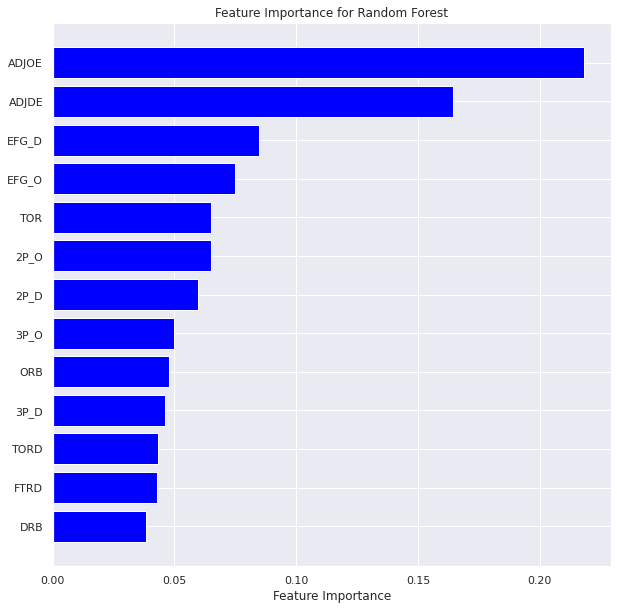

In [230]:
forest_sort = forest.feature_importances_.argsort()
plt.barh(cbb_features.columns[forest_sort], forest.feature_importances_[forest_sort], color=['blue'])
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Random Forest")

Text(0.5, 1.0, 'Feature Importance for Decision Tree Model')

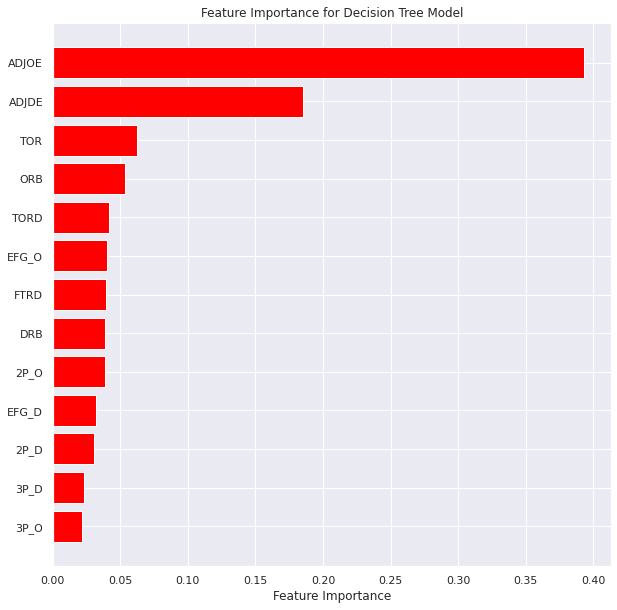

In [231]:
dt_sort = dt.feature_importances_.argsort()
plt.barh(cbb_features.columns[dt_sort], dt.feature_importances_[dt_sort], color=['red'])
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Decision Tree Model")

Text(0.5, 1.0, 'Model Coefficients for SVC Model')

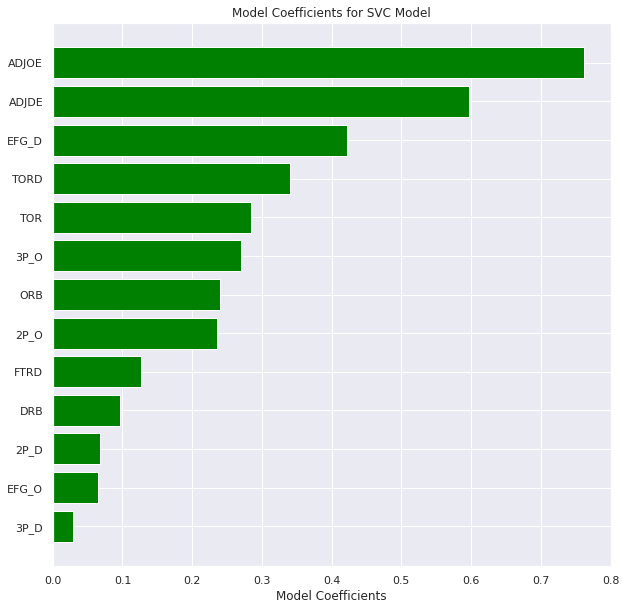

In [232]:
svc_sort = abs(svc.coef_[0]).argsort()
plt.barh(cbb_features.columns[svc_sort], abs(svc.coef_[0])[svc_sort], color=['green'])
plt.xlabel("Model Coefficients")
plt.title("Model Coefficients for SVC Model")

In [233]:
forest_params = {
    'n_estimators' : [100, 300, 500],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [4, 5, 6, 7, 8],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [234]:
CV_forest = GridSearchCV(estimator=forest, param_grid=forest_params)
CV_forest.fit(X_train, y_train)
params = CV_forest.best_params_
print(params)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 300}


In [235]:
forest_model = RandomForestClassifier(criterion=params['criterion'], max_depth=params['max_depth'],
    max_features=params['max_features'], n_estimators=params['n_estimators'], random_state=13)

In [236]:
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)
print(classification_report(y_test, forest_pred))

              precision    recall  f1-score   support

       False       0.92      0.96      0.94       495
        True       0.81      0.66      0.73       119

    accuracy                           0.90       614
   macro avg       0.87      0.81      0.83       614
weighted avg       0.90      0.90      0.90       614



https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

Text(0.5, 66.5, 'Predicted Label')

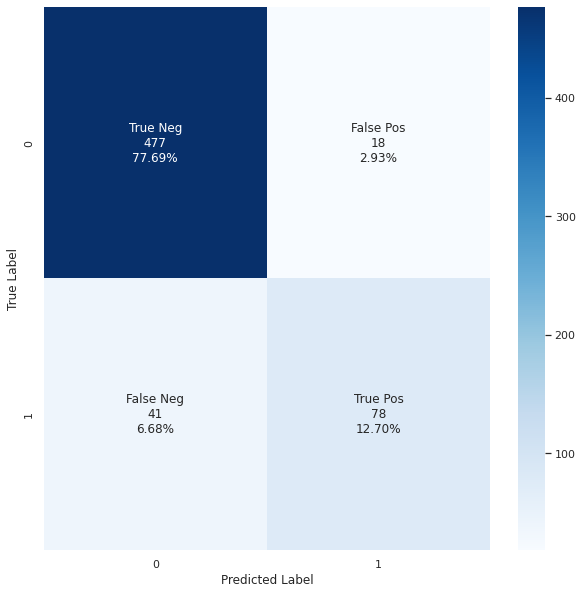

In [237]:
forest_cm = confusion_matrix(y_test, forest_pred)
group_name = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{0:0.0f}".format(value) for value in 
                forest_cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     forest_cm.flatten()/np.sum(forest_cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_name, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2,2)


sns.heatmap(forest_cm, annot=labels, fmt='', cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

Text(0.5, 1.0, 'Feature Importance for Random Forest')

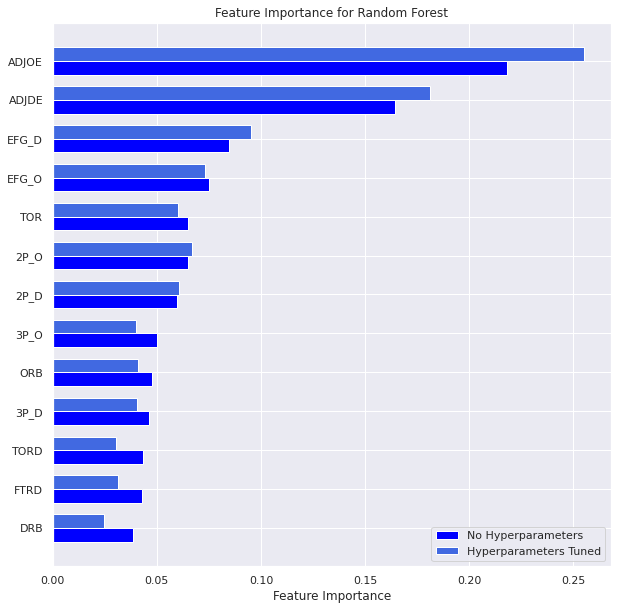

In [269]:
ind = np.arange(len(cbb_features.columns))
width = .35

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.barh(ind, forest.feature_importances_[forest_sort], width, color='blue', label='No Hyperparameters')
rects2 = ax.barh(ind + width, forest_model.feature_importances_[forest_sort], width, color='royalblue', label='Hyperparameters Tuned')

ax.set_yticks(ind + width / 2)
ax.set_yticklabels(cbb_features.columns[forest_sort])
plt.legend(loc='best')
plt.xlabel("Feature Importance")
plt.title("Comparing Feature Importance for Random Forest")


In [238]:
dt_params = {
    'ccp_alpha' : [0.1, .01, .001],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [4, 5, 6, 7, 8],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [239]:
CV_dt = GridSearchCV(estimator=dt, param_grid=dt_params)
CV_dt.fit(X_train, y_train)
params = CV_dt.best_params_
print(params)

{'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto'}


In [240]:
dt_model = tree.DecisionTreeClassifier(criterion=params['criterion'], max_depth=params['max_depth'],
    max_features=params['max_features'], ccp_alpha=params['ccp_alpha'], random_state=13)

In [241]:
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

       False       0.90      0.97      0.93       495
        True       0.83      0.54      0.65       119

    accuracy                           0.89       614
   macro avg       0.86      0.76      0.79       614
weighted avg       0.88      0.89      0.88       614



Text(0.5, 66.5, 'Predicted Label')

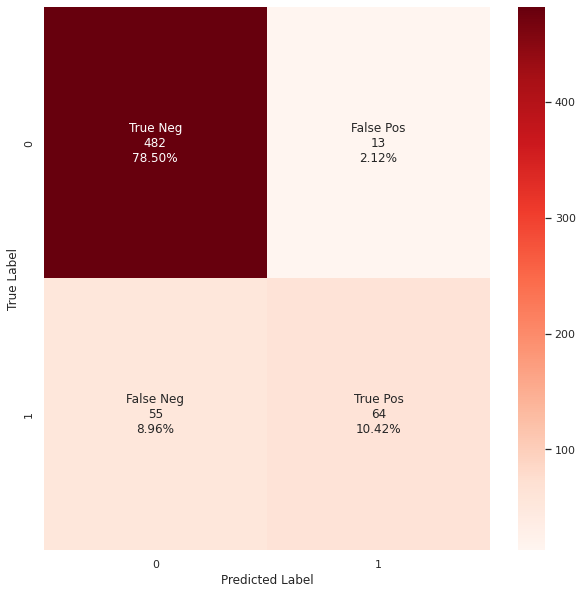

In [242]:
dt_cm = confusion_matrix(y_test, dt_pred)
group_name = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{0:0.0f}".format(value) for value in 
                    dt_cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     dt_cm.flatten()/np.sum(dt_cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_name, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2,2)


sns.heatmap(dt_cm, annot=labels, fmt='', cmap='Reds')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

Text(0.5, 1.0, 'Feature Importance for Decision Tree')

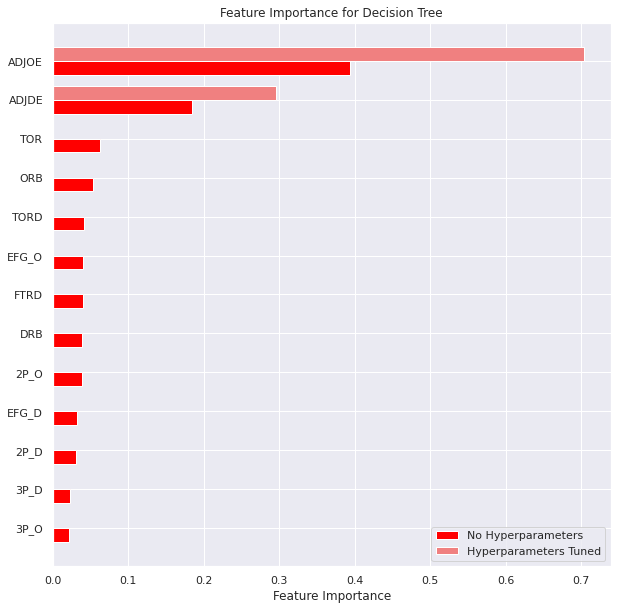

In [270]:
ind = np.arange(len(cbb_features.columns))
width = .35

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.barh(ind, dt.feature_importances_[dt_sort], width, color='red', label='No Hyperparameters')
rects2 = ax.barh(ind + width, dt_model.feature_importances_[dt_sort], width, color='lightcoral', label='Hyperparameters Tuned')

ax.set_yticks(ind + width / 2)
ax.set_yticklabels(cbb_features.columns[dt_sort])
plt.legend(loc='best')
plt.xlabel("Feature Importance")
plt.title("Comparing Feature Importance for Decision Tree")

In [243]:
svc_params = {
    'C' : [0.1, 1, 10, 100],
    'gamma' : ['scale', 'auto'],
}

In [244]:
CV_svc = GridSearchCV(estimator=svc, param_grid=svc_params)
CV_svc.fit(X_train, y_train)
params = CV_svc.best_params_
print(params)

{'C': 0.1, 'gamma': 'scale'}


In [245]:
svc_model = svm.SVC(C=params['C'],
    gamma=params['gamma'], kernel='linear', random_state=13)

In [246]:
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

       False       0.92      0.95      0.94       495
        True       0.76      0.67      0.71       119

    accuracy                           0.90       614
   macro avg       0.84      0.81      0.83       614
weighted avg       0.89      0.90      0.89       614



Text(0.5, 66.5, 'Predicted Label')

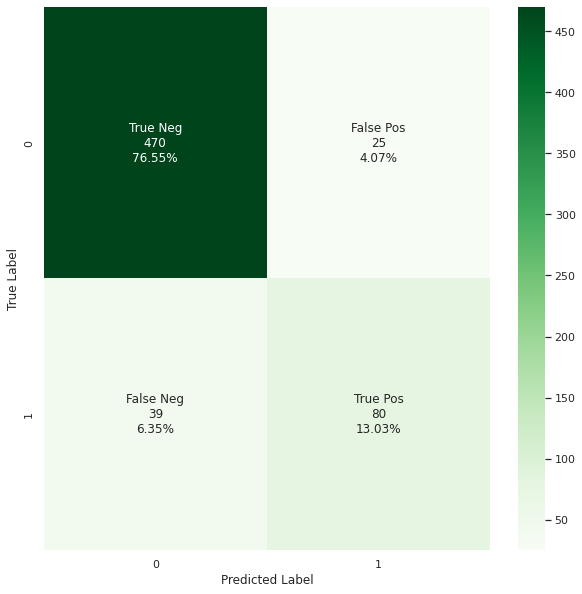

In [247]:
svc_cm = confusion_matrix(y_test, svc_pred)
group_name = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{0:0.0f}".format(value) for value in 
                    svc_cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                    svc_cm.flatten()/np.sum(svc_cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_name, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2,2)


sns.heatmap(svc_cm, annot=labels, fmt='', cmap='Greens')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

Text(0.5, 1.0, 'Model Coefficients for SVC')

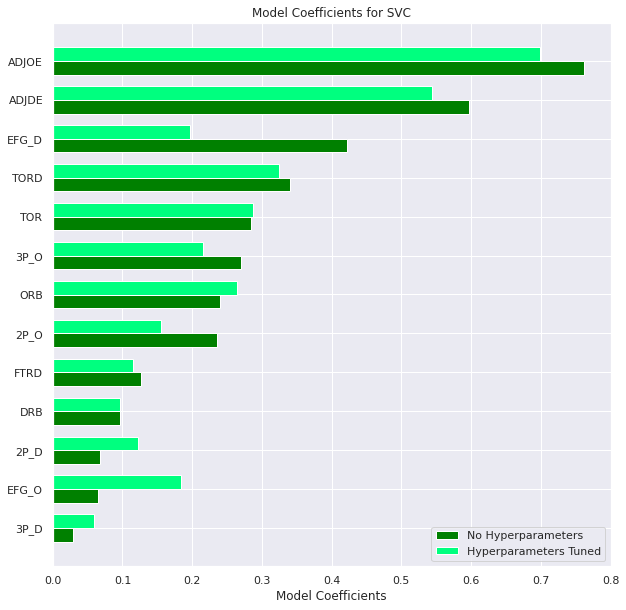

In [271]:
ind = np.arange(len(cbb_features.columns))
width = .35

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.barh(ind,  abs(svc.coef_[0])[svc_sort], width, color='green', label='No Hyperparameters')
rects2 = ax.barh(ind + width, abs(svc_model.coef_[0])[svc_sort], width, color='springgreen', label='Hyperparameters Tuned')

ax.set_yticks(ind + width / 2)
ax.set_yticklabels(cbb_features.columns[svc_sort])
plt.legend(loc='best')
plt.xlabel("Model Coefficients")
plt.title("Comparing Model Coefficients for SVC")